In [25]:
import matplotlib.pyplot as plt 
import torch 
import numpy as np

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

from torch import nn
from torchvision import transforms 

import onnxruntime
import torch.onnx as onnx

# PyTorch

* Tensors
* Manege, scale and normalize our datasets
* Build a model
* Optimize a model
* Enhance model inference performace

## Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy arrays and ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory address with a capability called <code>bridge-to-np-label</code>, which eliminates the need to copy data. Tensors are also **optimized for automatic differentiation**(we'll see more about that later in the Autograd unit). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

### Directly from data

In [2]:
# initializing tensors
torch.tensor( [[1,2],[3,4]] )

tensor([[1, 2],
        [3, 4]])

### From a Numpy array

In [3]:
# Tensors can be created from NumPy arrays and vice versa.
#  Since, numpy 'np_array' and tensor 'x_np' share the same 
# memory location here, changing the value for one will change the other.
data = [[1,2],[3,4]]
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(f"Numpy np_array value: \n {np_array} \n")
print(f"Tensor x_np value: \n {x_np} \n")

np.multiply(np_array, 2, out=np_array)

print(f"Numpy np_array after * 2 operation: \n {np_array} \n")
print(f"Tensor x_np value after modifying numpy array: \n {x_np} \n")

Numpy np_array value: 
 [[1 2]
 [3 4]] 

Tensor x_np value: 
 tensor([[1, 2],
        [3, 4]]) 

Numpy np_array after * 2 operation: 
 [[2 4]
 [6 8]] 

Tensor x_np value after modifying numpy array: 
 tensor([[2, 4],
        [6, 8]]) 



### From another tensor

In [5]:
# The new tensor retains the properties (shape, data type) 
# of the argument tensor, unless explicitly overridden.
x_data = torch.tensor([[1,2],[3,4]])

x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4965, 0.0070],
        [0.4998, 0.3301]]) 

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4193, 0.5850],
        [0.7818, 0.8751]]) 



### With random or constant values

In [6]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.3865, 0.6704, 0.1656],
        [0.4116, 0.5536, 0.1901]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Attributes of a tensor

In [7]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operations on Tensors

Code for processing data samples can get complex and hard to maintain. We typically want our dataset code to be decoupled from our model training code, for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that enable you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of sample pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset and implement functions specific to the particular data. Samples for prototyping and benchmarking your model include:

Image Datasets
Text Datasets
Audio Datasets

In [11]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print("Work in GPU")
else :
  print("Work in CPU")


Work in CPU


### Standar numpy-like indexing and slicing

In [12]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### Joining tensors

In [13]:
# You can use torch.cat to concatenate a sequence of 
#tensors along a given dimension. torch.stack is a related 
#tensor joining option that #concatenates a sequence of 
#tensors along a new dimension.
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


### Arithmetic operations

In [14]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

### Single-element tensors

In [15]:
agg = tensor.sum()
agg_item = agg.item()  
print(agg_item, type(agg_item))

12.0 <class 'float'>


### In-place operations

In [17]:
# Operations that store the result into the operand are called in-place. Use "_"
# n-place operations save some memory, but can be problematic when 
# computing derivatives because of their immediate loss of history. 
# Hence, their use is discouraged.
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]]) 

tensor([[11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.]])


### Tensor to NumPy array

In [18]:
# Since, numpy 'np_array' and tensor 'x_np' share the 
# same memory location here, changing the value for one 
# will change the other.
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### NumPy array to tensor

In [19]:
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Loading and normalizing datasets

Code for processing data samples can get complex and hard to maintain. We typically want our dataset code to be decoupled from our model training code, for better readability and modularity. PyTorch provides two data primitives: <code>torch.utils.data.DataLoader</code> and <code>torch.utils.data.Dataset</code> that enable you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of sample pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset and implement functions specific to the particular data. Samples for prototyping and benchmarking your model include:
* Image Datasets
* Text Datasets
* Audio Datasets

### Loading a dataset

In [122]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Preparing your data for training with DataLoaders

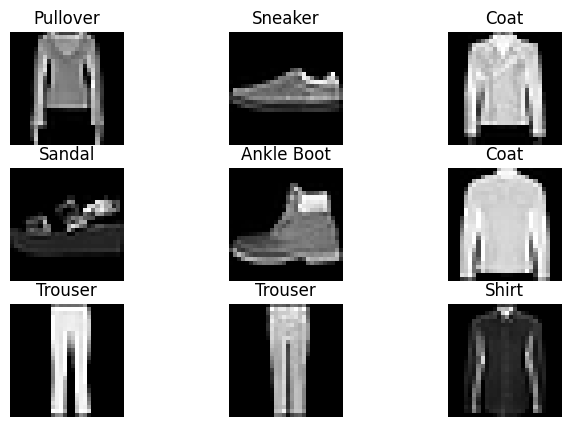

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 5))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [7]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [9]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


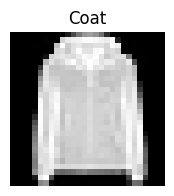

In [28]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.figure(figsize=(5,2))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title(list(labels_map.values())[label])
plt.show()

### Normalization

Normalization is a common data pre-processing technique that is applied to scale or transform the data to make sure there's an equal learning contribution from each feature. For example, each pixel in the grayscale images have a value between 0 and 255, which are features. If one pixel value is 17 and another pixel is 197. There will be an uneven distribution of the pixel importance, because the higher pixel volumes will deviate the learning. Normalization changes the range of your data, without distorting its distinction among our features. This pre-processing is done to avoid:
* A reduction of the prediction accuracy
* Difficulty for the model to learn
* Unfavorable distribution of the feature data ranges

In [29]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [30]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

## Building the model layers

A neural network is a collection of neurons that are connected by layers. Each neuron is a small computing unit that performs simple calculations to collectively solve a problem. Neurons are organized in 3 types of layers: input layer, hidden layer, and output layer. The hidden and output layers contain a number of neurons. Neural networks mimic the way a human brain processes information.

Components:
* Activation function
* Weights
* Bias

### Define the class

In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("using {} device".format(device))

using cpu device


In [34]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [35]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [39]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([4])


### Model layers

The nn.Linear module randomly initializes the weights and bias for each layer and internally stores the values in Tensors.

In [41]:
#print(f"First Linear weights: {model.linear_relu_stack[0].weight} \n")
#print(f"First Linear biases: {model.linear_relu_stack[0].bias} \n")

In [42]:
input_image = torch.rand(3,28,28)
print(input_image.size())

# Flatten
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

# Linear
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

# ReLU
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

torch.Size([3, 28, 28])
torch.Size([3, 784])
torch.Size([3, 20])
Before ReLU: tensor([[-0.0431, -0.0222,  0.0924, -0.2502,  0.2257,  0.4530, -0.2952, -0.2699,
         -0.2711,  0.1961,  0.1972,  0.7181,  0.1231,  0.2480,  0.9738,  0.1781,
         -0.3109, -0.3283, -0.3424, -0.2506],
        [-0.3640, -0.2059,  0.0984, -0.0393,  0.4140,  0.6013,  0.1620, -0.7382,
          0.0126,  0.0517, -0.1036,  0.8402,  0.1494,  0.3347,  0.7138,  0.4903,
         -0.0972, -0.3165, -0.1721, -0.2911],
        [-0.5803, -0.4153, -0.0627, -0.3340,  0.2775,  0.6228, -0.1419, -0.5910,
         -0.1302, -0.1002,  0.0831,  0.8780, -0.1504,  0.2916,  0.7268,  0.0301,
         -0.4626, -0.5813, -0.2967,  0.0568]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.0924, 0.0000, 0.2257, 0.4530, 0.0000, 0.0000, 0.0000,
         0.1961, 0.1972, 0.7181, 0.1231, 0.2480, 0.9738, 0.1781, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0984, 0.0000, 0.4140, 0.6013, 0.1620, 0.00

In [43]:
# Sequential
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

# Softmax
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

### Model parameters

In [45]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters(): # parameters()
    print(f"Layer: {name} | Size: {param.size()}\n")#| Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784])

Layer: linear_relu_stack.0.bias | Size: torch.Size([512])

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512])

Layer: linear_relu_stack.2.bias | Size: torch.Size([512])

Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512])

Layer: linear_relu_stack.4.bias | Size: torch.Size([10])



## Automatic differentiation

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter. The loss function calculates the difference between the expected output and the actual output that a neural network produces. The goal is to get the result of the loss function as close to zero as possible. The algorithm traverses backwards through the neural network to adjust the weights and bias to retrain the model. That's why it's called back propagation. This back and forward process of retraining the model over time to reduce the loss to 0 is called the gradient descent.

In [119]:
x = torch.tensor([1.], requires_grad=True)
y = x ** 2
z = 2 * y + 3

loss = z.mean()
loss.backward()#torch.tensor(1.0)

print("Gradient of x:", x.grad)

Gradient of x: tensor([4.])


### Simple layer

Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. 

In [113]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
# In this network, w and b are parameters, which we 
# need to optimize. Therefore, we need to be able to 
# compute the gradients of loss function with respect 
# to those variables. 
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [101]:
z.grad_fn

### Computing gradients

In [114]:
print(w.grad)
loss.backward()#retain_graph=True
print(w.grad)

None
tensor([[0.2550, 0.0238, 0.3263],
        [0.2550, 0.0238, 0.3263],
        [0.2550, 0.0238, 0.3263],
        [0.2550, 0.0238, 0.3263],
        [0.2550, 0.0238, 0.3263]])


Note: We can only obtain the grad properties for the leaf nodes of the computational graph which have the requires_grad property set to True. For all other nodes in our graph, gradients will not be available. In addition, we can only perform gradient calculations using backward once on a given graph, for performance reasons. If we need to do several backward calls on the same graph, we need to pass retain_graph=True to the backward call.

### Disabling gradint tracking

In [115]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [116]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


There are reasons you might want to disable gradient tracking:
  - To mark some parameters in your neural network as **frozen parameters**. This is a very common scenario for fine tuning a pre-trained network.
  - To **speed up computations** when you are only doing a forward pass, because computations on tensors that do not track gradients are more efficient.

### More on computational graphs


Conceptually, autograd keeps a record of data (tensors) and all executed operations (along with the resulting new tensors) in a directed acyclic graph (DAG) consisting of [Function](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
objects. In this DAG, leaves are the input tensors, roots are the output tensors. By tracing this graph from roots to leaves, you can
automatically compute the gradients using the chain rule.

In a forward pass, autograd does two things simultaneously:

- runs the requested operation to compute a resulting tensor, and
- maintains the operation’s *gradient function* in the DAG.

The backward pass kicks off when `.backward()` is called on the DAG root. `autograd` then:

- computes the gradients from each `.grad_fn`,
- accumulates them in the respective tensor’s `.grad` attribute, and
- using the chain rule, propagates all the way to the leaf tensors.

**DAGs are dynamic in PyTorch**

  An important thing to note is that the graph is recreated from scratch; after each `.backward()` call, autograd starts populating a new graph. This is exactly what allows you to use control flow statements in your model; you can change the shape, size and operations at every iteration if needed.

### Tensor gradients and Jacobian products


In many cases, we have a scalar loss function, and we need to compute the gradient with respect to some parameters. However, there are cases when the output function is an arbitrary tensor. In this case, PyTorch allows you to compute a **Jacobian product**, and not the actual gradient.

For a vector function $\vec{y}=f(\vec{x})$, where
$\vec{x}=\langle x_1,\dots,x_n\rangle$ and
$\vec{y}=\langle y_1,\dots,y_m\rangle$, a gradient of
$\vec{y}$ with respect to $\vec{x}$ is given by a **Jacobian
matrix**, whose element $J_{ij}$ contains $\frac{\partial y_{i}}{\partial x_{j}}$.

Instead of computing the Jacobian matrix itself, PyTorch allows you to compute **Jacobian product** $v^T\cdot J$ for a given input vector $v=(v_1 \dots v_m)$. This is achieved by calling `backward` with $v$ as an argument. The size of $v$ should be the same as
the size of the original tensor, with respect to which we want to compute the product:

In [120]:
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print("First call\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nSecond call\n", inp.grad)
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nCall after zeroing gradients\n", inp.grad)

First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


## Optimization loop

Training a model is an iterative process; in each iteration (epoch). The model makes a guess about the output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters (differentiation), and optimizes these parameters using gradient descent.

### Data

In [7]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

### Model

In [8]:

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

### Hyperparameters, Optimization loop, Loss function, Optimization pass

We define the following hyperparameters for training:
 - **Number of Epochs** - the number times the entire training dataset is passed through the network. 
 - **Batch Size** - the number of data samples seen by the model in each epoch. Iterates over the number of batches needed to complete an epoch.
 - **Learning Rate** - the size of steps that the model matches as it searches for the best weights that will produce a higher model accuracy. Smaller values means the model will take a longer time to find the best weights. Larger values may result in the model stepping over and missing the best weights, which yields unpredictable behavior during training.

In [6]:
learning_rate = 1e-3
batch_size = 64
epochs = 5


Each epoch consists of two main parts:
 - **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters.
 - **The Validation/Test Loop** - iterate ove

Common loss functions include:

- `nn.MSELoss` (Mean Square Error) used for regression tasks
- `nn.NLLLoss` (Negative Log Likelihood) used for classification
- `nn.CrossEntropyLoss` combines `nn.LogSoftmax` and `nn.NLLLoss`

We pass our model's output logits to `nn.CrossEntropyLoss`, which will normalize the logits and compute the prediction error.

In [4]:
loss_fn = nn.CrossEntropyLoss()

Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed (in this example we use Stochastic Gradient Descent). All optimization logic is encapsulated in the optimizer object. Here, we use the SGD optimizer; there are many different optimizers available in PyTorch such as ADAM and RMSProp, that are suited for different kinds of models and data.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing in the learning rate hyperparameter.

In [9]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:
 * Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
 * Back-propagate the prediction loss with a call to `loss.backwards()`. PyTorch deposits the gradients of the loss with respect to each parameter. 
 * Once we have our gradients, we call `optimizer.step()` to adjust the parameters by the gradients collected in the backward pass.

### Full model

In [1]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.278961  [    0/60000]
loss: 2.267338  [ 6400/60000]
loss: 2.260555  [12800/60000]
loss: 2.248896  [19200/60000]
loss: 2.208221  [25600/60000]
loss: 2.232618  [32000/60000]
loss: 2.206102  [38400/60000]
loss: 2.203166  [44800/60000]
loss: 2.209919  [51200/60000]
loss: 2.155845  [57600/60000]
Test Error: 
 Accuracy: 49.3%, Avg loss: 0.034031 

Epoch 2
-------------------------------
loss: 2.213964  [    0/60000]
loss: 2.177117  [ 6400/60000]
loss: 2.161419  [12800/60000]
loss: 2.135564  [19200/60000]
loss: 2.039534  [25600/60000]
loss: 2.101425  [32000/60000]
loss: 2.067020  [38400/60000]
loss: 2.063290  [44800/60000]
loss: 2.090245  [51200/60000]
loss: 1.966434  [57600/60000]
Test Error: 
 Accuracy: 48.9%, Avg loss: 0.031477 

Epoch 3
-------------------------------
loss: 2.112082  [    0/60000]
loss: 2.031513  [ 6400/60000]
loss: 2.013175  [12800/60000]
loss: 1.961699  [19200/60000]
loss: 1.792545  [25600/60000]
loss: 1.926800  [32000/600

### Saving models

In [16]:
torch.save(model.state_dict(), "data/LowLevel-PyTorch.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## Load and run model predictions

To load the model, we'll **define the model** class which contains the **state and parameters of** the neural network used to train the model.

When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. Next, we **load the parameters** using the load_state_dict() method.

In [17]:
# Structure
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [18]:
model = NeuralNetwork()
model.load_state_dict(torch.load('data/LowLevel-PyTorch.pth'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

> Note: Be sure to call the model.eval() method before inferencing to set the dropout and batch normalization layers to evaluation mode. Otherwise, you'll see inconsistent inference results.

### ONNX

Optimizing a models to run on a variety of platforms and programming languages is difficult. It's very time-consuming to maximize performance across all the different combinations of frameworks and hardware. The Open Neural Network Exchange (ONNX) runtime provides a solution for you to train once and accelerate inference on any hardware, cloud, or edge devices.

ONNX is a common format supported by a number of vendors to share neural networks and other machine learning models. You can use ONNX format to do inference on your model on other programming languages and frameworks such as Java, JavaScript, C# and ML.NET.

In [26]:
input_image = torch.zeros((1,28,28))
onnx_model = 'data/model.onnx'
onnx.export(model, input_image, onnx_model)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
x, y = test_data[0][0], test_data[0][1]

session = onnxruntime.InferenceSession(onnx_model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

result = session.run([output_name], {input_name: x.numpy()})
predicted, actual = classes[result[0][0].argmax(0)], classes[y]
print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


## Full model building process

### Data

In [27]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


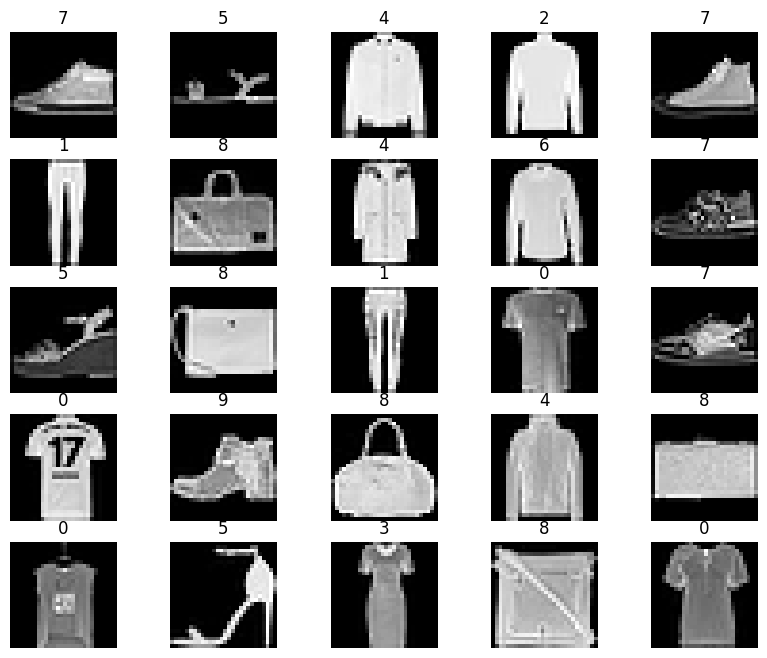

In [28]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break
    
# Display sample data
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Model

In [29]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


### Optimizations

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [30]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

            
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [31]:
epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model)
print("Done!")

Epoch 1
-------------------------------
loss: 2.309269  [    0/60000]
loss: 2.311142  [ 6400/60000]
loss: 2.310029  [12800/60000]
loss: 2.305655  [19200/60000]
loss: 2.313482  [25600/60000]
loss: 2.308642  [32000/60000]
loss: 2.306897  [38400/60000]
loss: 2.306040  [44800/60000]
loss: 2.306520  [51200/60000]
loss: 2.308580  [57600/60000]
Test Error: 
 Accuracy: 7.5%, Avg loss: 0.036244 

Epoch 2
-------------------------------
loss: 2.309269  [    0/60000]
loss: 2.311142  [ 6400/60000]
loss: 2.310029  [12800/60000]
loss: 2.305655  [19200/60000]
loss: 2.313482  [25600/60000]
loss: 2.308642  [32000/60000]
loss: 2.306897  [38400/60000]
loss: 2.306040  [44800/60000]
loss: 2.306520  [51200/60000]
loss: 2.308580  [57600/60000]
Test Error: 
 Accuracy: 7.5%, Avg loss: 0.036244 

Epoch 3
-------------------------------
loss: 2.309269  [    0/60000]
loss: 2.311142  [ 6400/60000]
loss: 2.310029  [12800/60000]
loss: 2.305655  [19200/60000]
loss: 2.313482  [25600/60000]
loss: 2.308642  [32000/60000

### Saving models

In [34]:
torch.save(model.state_dict(), "data/LowLevel-Pytorch2.pth")
print("Saved PyTorch Model State to LowLevel-Pytorch2.pth")

Saved PyTorch Model State to LowLevel-Pytorch2.pth
